In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
X = train.drop('label', axis=1)
y = train['label']

In [4]:
X = X/255

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [784]


In [5]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [6]:
model = keras.Sequential([

    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=2),
    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(10,activation = 'softmax')
    
])

In [7]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [8]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
)

history = model.fit(
    x_train, y_train ,
    epochs=50,
    callbacks=[early_stopping],
    batch_size=200,#64
    validation_data =(x_test,y_test)
    
)

Epoch 1/50
168/168 [==============================] - 7s 22ms/step - loss: 0.5456 - accuracy: 0.8215 - val_loss: 0.1446 - val_accuracy: 0.9611
Epoch 2/50
168/168 [==============================] - 4s 21ms/step - loss: 0.1035 - accuracy: 0.9704 - val_loss: 0.1013 - val_accuracy: 0.9713
Epoch 3/50
168/168 [==============================] - 4s 21ms/step - loss: 0.0620 - accuracy: 0.9806 - val_loss: 0.0911 - val_accuracy: 0.9737
Epoch 4/50
168/168 [==============================] - 4s 21ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0719 - val_accuracy: 0.9799
Epoch 5/50
168/168 [==============================] - 4s 21ms/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.0542 - val_accuracy: 0.9864
Epoch 6/50
168/168 [==============================] - 4s 21ms/step - loss: 0.0250 - accuracy: 0.9915 - val_loss: 0.0618 - val_accuracy: 0.9855
Epoch 7/50
168/168 [==============================] - 4s 21ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0520 - val_accuracy: 0.9857

In [9]:
test_reshape = test.values.reshape(-1, 28, 28, 1)

In [10]:
test_reshape

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [11]:
submit = pd.DataFrame(np.argmax(model.predict(test_reshape), axis=1), columns=['Label'], 
                      index=pd.read_csv('./sample_submission.csv')['ImageId'])

In [12]:
submit.index.name = 'ImageID'
submit.to_csv('submission6.csv')

<AxesSubplot:>

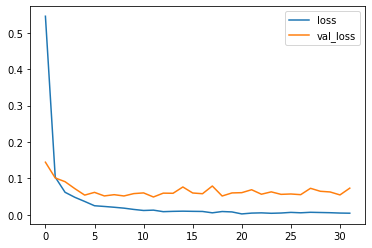

In [16]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.011628813110291958
Test accuracy: 0.1578136831521988
